### `Cohort Analysis:`

Cohort Analysis involves dividing users into distinct groups, or cohorts based on certain criteria such as time of user acquisation. This will help us study how different cohorts behave in terms of engagement and retention.

For example, creating cohorts based on the month users first signed up for your service. You can track how each cohort activity - like their conversion rate/life-time value - evolve overtime. This approach enables you to identify trends, anomalies, and areas where you may need to make adjustments to improve user retention and satisfaction.

### `Retention Rate Time-Based Cohort Analysis:`

This is a specilized form of cohort analysis that focuses on retention of users over multiple time periods.

The steps to perform retention rate time-based cohort analysis include:

- Create cohorts based on user acquisition dates.
- Measure the percentage of users from each cohort who continue to engage with your products/services overtime - after 1 month, 3 months, etc -
- Analyze how retention rates vary accross different cohorts and time periods, enabling you to identify trends and make data-driven decisions.

This analysis can highlight cohorts with better/worse retention rate, helping the business to understand the factors influency user retention/attrition, assist in optimizing marketing, product development, and customer support strategies.

# Import Libraries

In [227]:
# Data Analysis and Manipulation
import pandas as pd
import numpy as np

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Date Time Manipulation
import datetime as dt

# for progress bar
from tqdm import tqdm
tqdm.pandas()

# Load Dataset

In [229]:
cohort_data = pd.read_csv('Dataset_ecommerce.csv')

In [231]:
cohort_data.head(5)

,InvoiceNo,InvoiceDate,CustomerID,StockCode,Description,Quantity,UnitPrice,Country
0,536365,2010-12-01 08:26:00,17850.0,SC1734,Electronics,65,10.23,Egypt
1,536365,2010-12-01 08:26:00,17850.0,SC2088,Furniture,95,19.61,Mali
2,536365,2010-12-01 08:26:00,17850.0,SC3463,Books,78,61.49,Mali
3,536365,2010-12-01 08:26:00,17850.0,SC6228,Toys,15,24.73,South Africa
4,536365,2010-12-01 08:26:00,17850.0,SC2149,Toys,50,38.83,Rwanda


In [233]:
# Descrptive stat

cohort_data.describe(include = 'all')

,InvoiceNo,InvoiceDate,CustomerID,StockCode,Description,Quantity,UnitPrice,Country
count,541909,541909,406829.000000,541909,541909,541909.000000,541909.000000,541909
unique,25900,23260,NaN,9000,10,NaN,NaN,28
top,573585,2011-10-31 14:41:00,NaN,SC2014,Sports Equipment,NaN,NaN,Cote d'Ivoire
freq,1114,1114,NaN,96,54765,NaN,NaN,19651
mean,NaN,NaN,15287.690570,NaN,NaN,50.534748,50.476354,NaN
std,NaN,NaN,1713.600303,NaN,NaN,28.849367,28.564775,NaN
min,NaN,NaN,12346.000000,NaN,NaN,1.000000,1.000000,NaN
25%,NaN,NaN,13953.000000,NaN,NaN,26.000000,25.750000,NaN
50%,NaN,NaN,15152.000000,NaN,NaN,51.000000,50.430000,NaN
75%,NaN,NaN,16791.000000,NaN,NaN,76.000000,75.180000,NaN


In [235]:
# checking for missing data

cohort_data.isnull().sum()

InvoiceNo           0
InvoiceDate         0
CustomerID     135080
StockCode           0
Description         0
Quantity            0
UnitPrice           0
Country             0
dtype: int64

In [237]:
# dropping the missing data in customerID as it could be as a result of ommision/not likely significantly impact our analysis

cohort_data.dropna(inplace = True)

In [239]:
# check for information on our dataframe
cohort_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    406829 non-null  object 
 1   InvoiceDate  406829 non-null  object 
 2   CustomerID   406829 non-null  float64
 3   StockCode    406829 non-null  object 
 4   Description  406829 non-null  object 
 5   Quantity     406829 non-null  int64  
 6   UnitPrice    406829 non-null  float64
 7   Country      406829 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 27.9+ MB


In [243]:
# Convert InvoiceDate to datetime format
cohort_data['InvoiceDate'] = pd.to_datetime(cohort_data['InvoiceDate'])

# Exploratory Data Analysis

**Analysis by Country**

In [245]:
quantity_by_country = cohort_data.groupby(['Country'])['Quantity'].sum().reset_index()
quantity_by_country = quantity_by_country.sort_values('Quantity', ascending = False).reset_index()

In [247]:
quantity_by_country

,index,Country,Quantity
0,23,Togo,741223
1,20,South Africa,740589
2,4,Cote d'Ivoire,740229
3,15,Nigeria,739708
4,9,Libya,739206
5,1,Benin,738133
6,27,Zimbabwe,737522
7,19,Somalia,736219
8,0,Algeria,736181
9,18,Sierra Leone,735477


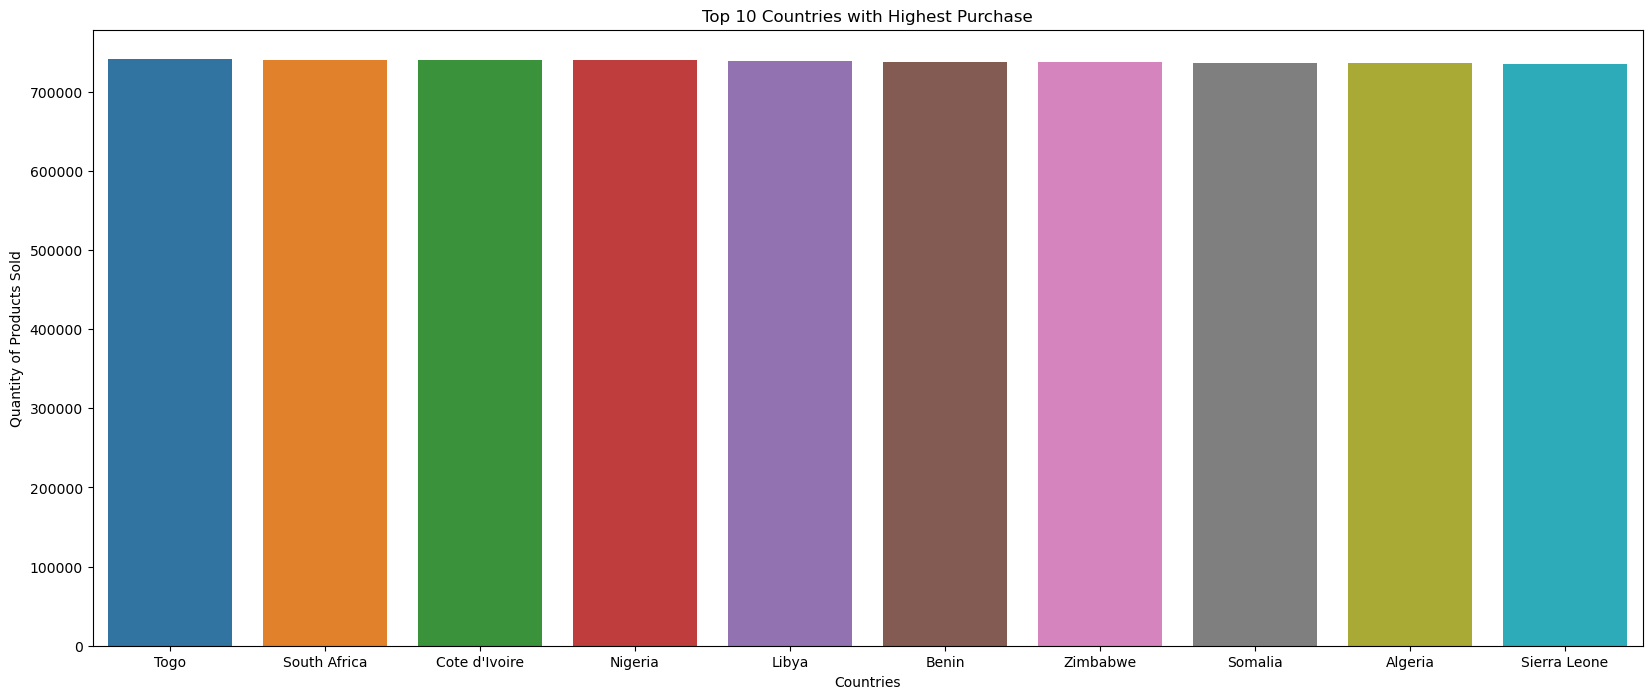

In [251]:
# Visualize Top 10 Countries where most products are sold
top_10_countries = quantity_by_country.head(10)

plt.figure(figsize = (20, 8))
ax = sns.barplot(x = 'Country', y = 'Quantity', data = top_10_countries)

plt.xlabel('Countries')
plt.ylabel('Quantity of Products Sold')
plt.title('Top 10 Countries with Highest Purchase')

plt.show();

*Consistent/Uniform sales performance across Top 10 Countries. This suggest a balanced approach to maintaining operations in all countries.*

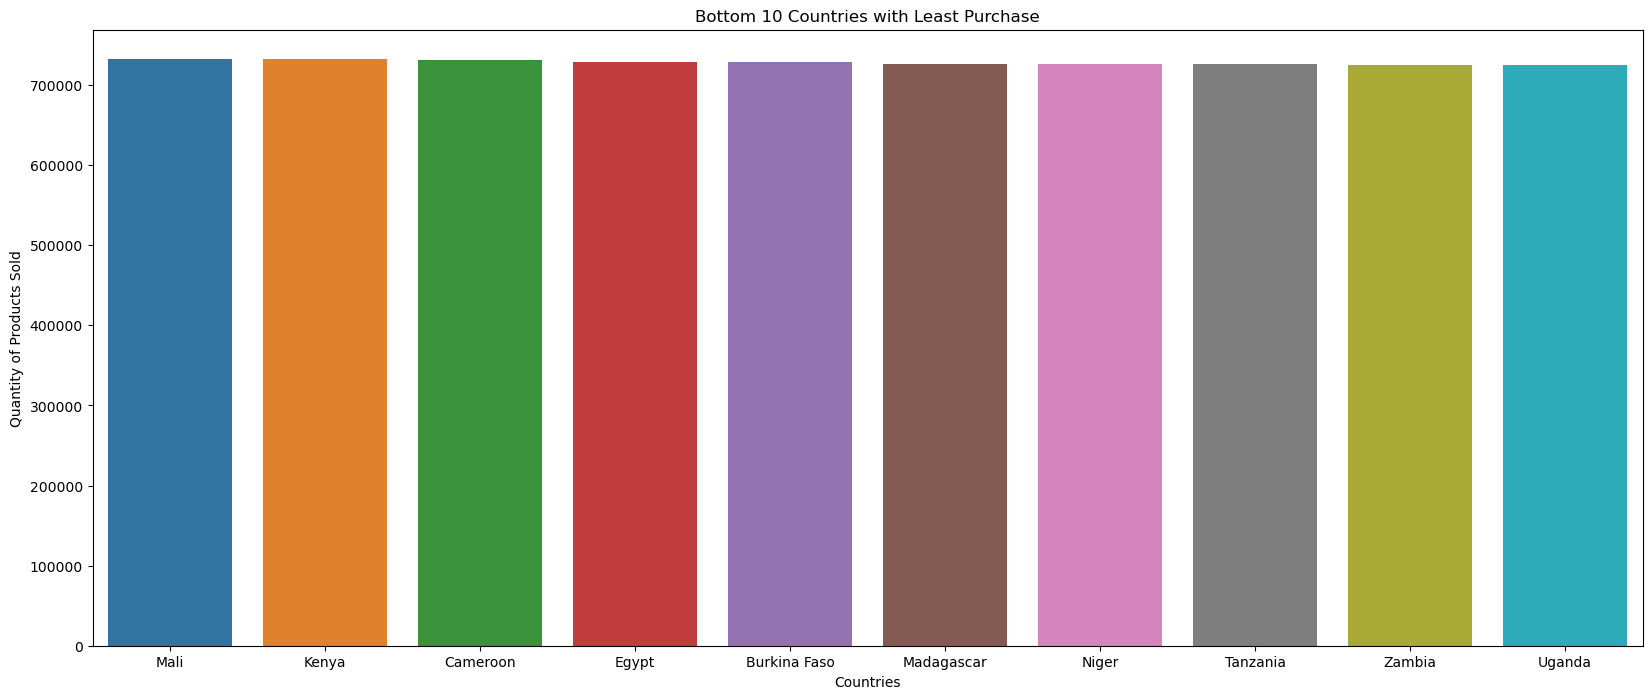

In [253]:
# Visualize Least 10 Countries where most products are sold
bottom_10_countries = quantity_by_country.tail(10)

plt.figure(figsize = (20, 8))
ax = sns.barplot(x = 'Country', y = 'Quantity', data = bottom_10_countries)

plt.xlabel('Countries')
plt.ylabel('Quantity of Products Sold')
plt.title('Bottom 10 Countries with Least Purchase')

plt.show();

*Uniform low sales across Bottom 10 Countries*

**Analysis of Countries and Number of Customers**

In [257]:
country_to_customers = cohort_data.groupby(['Country'])['CustomerID'].nunique().reset_index()
country_to_customers = country_to_customers.sort_values('CustomerID', ascending = False).reset_index()

In [259]:
country_to_customers

,index,Country,CustomerID
0,13,Mozambique,3072
1,1,Benin,3054
2,23,Togo,3053
3,15,Nigeria,3051
4,2,Burkina Faso,3049
5,18,Sierra Leone,3046
6,11,Mali,3044
7,0,Algeria,3043
8,17,Senegal,3040
9,14,Niger,3039


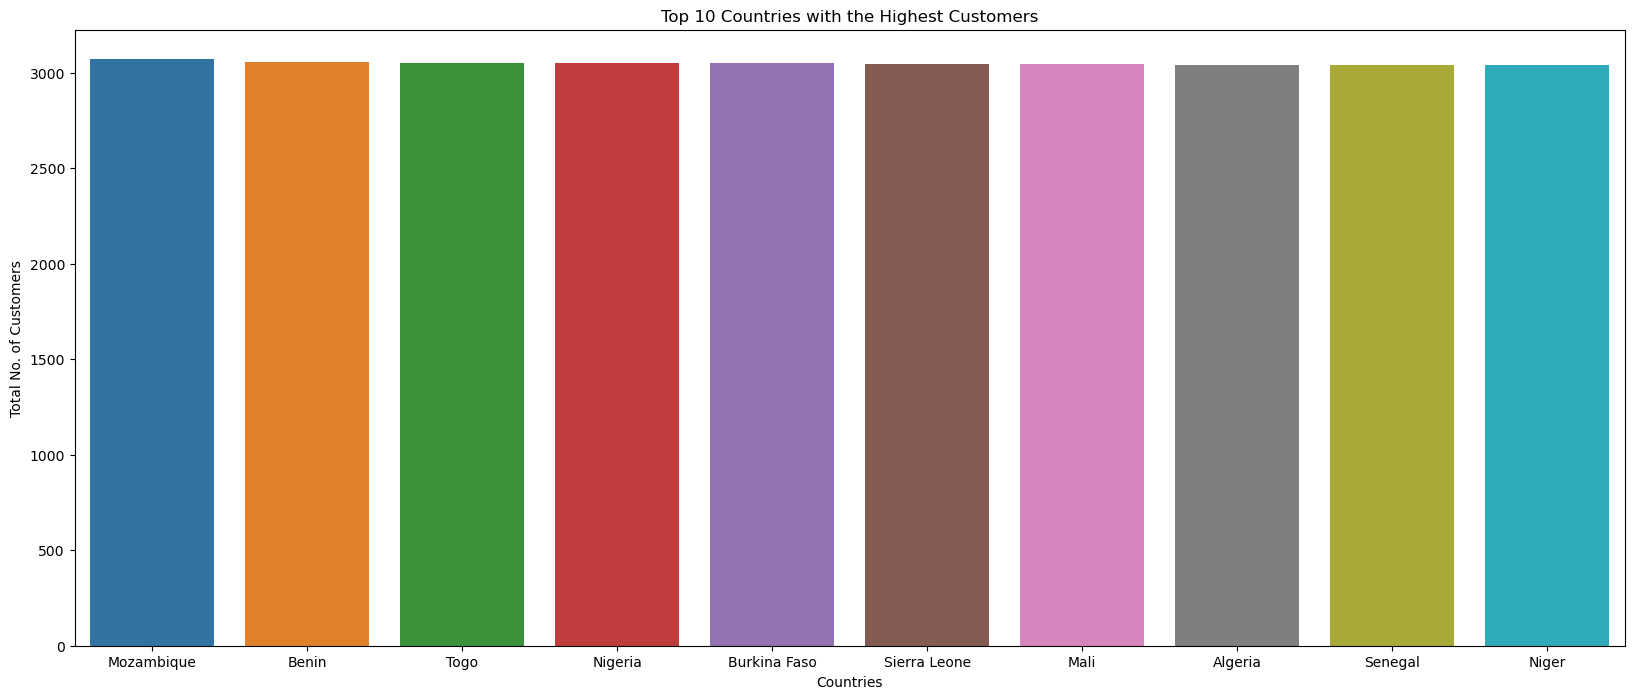

In [261]:
# Visualize Top 10 Countries with most customers

top10_countries_to_customers = country_to_customers.head(10)

plt.figure(figsize = (20, 8))
ax = sns.barplot(x = 'Country', y = 'CustomerID', data = top10_countries_to_customers)

plt.xlabel('Countries')
plt.ylabel('Total No. of Customers')
plt.title('Top 10 Countries with the Highest Customers')

plt.show();

*Uniform customer distribution across Top 10 countries. This indicates no single country has a significantly larger customer base.*

**Sales Trend Visualization**

In [263]:
monthly_sales = cohort_data.groupby(cohort_data['InvoiceDate'].dt.to_period('M'))['Quantity'].sum()

InvoiceDate
2010-12    1350834
2011-01    1105886
2011-02    1033468
2011-03    1406617
2011-04    1175052
2011-05    1459981
2011-06    1402857
2011-07    1388119
2011-08    1387695
2011-09    2061181
2011-10    2559609
2011-11    3313177
2011-12     891630
Freq: M, Name: Quantity, dtype: int64


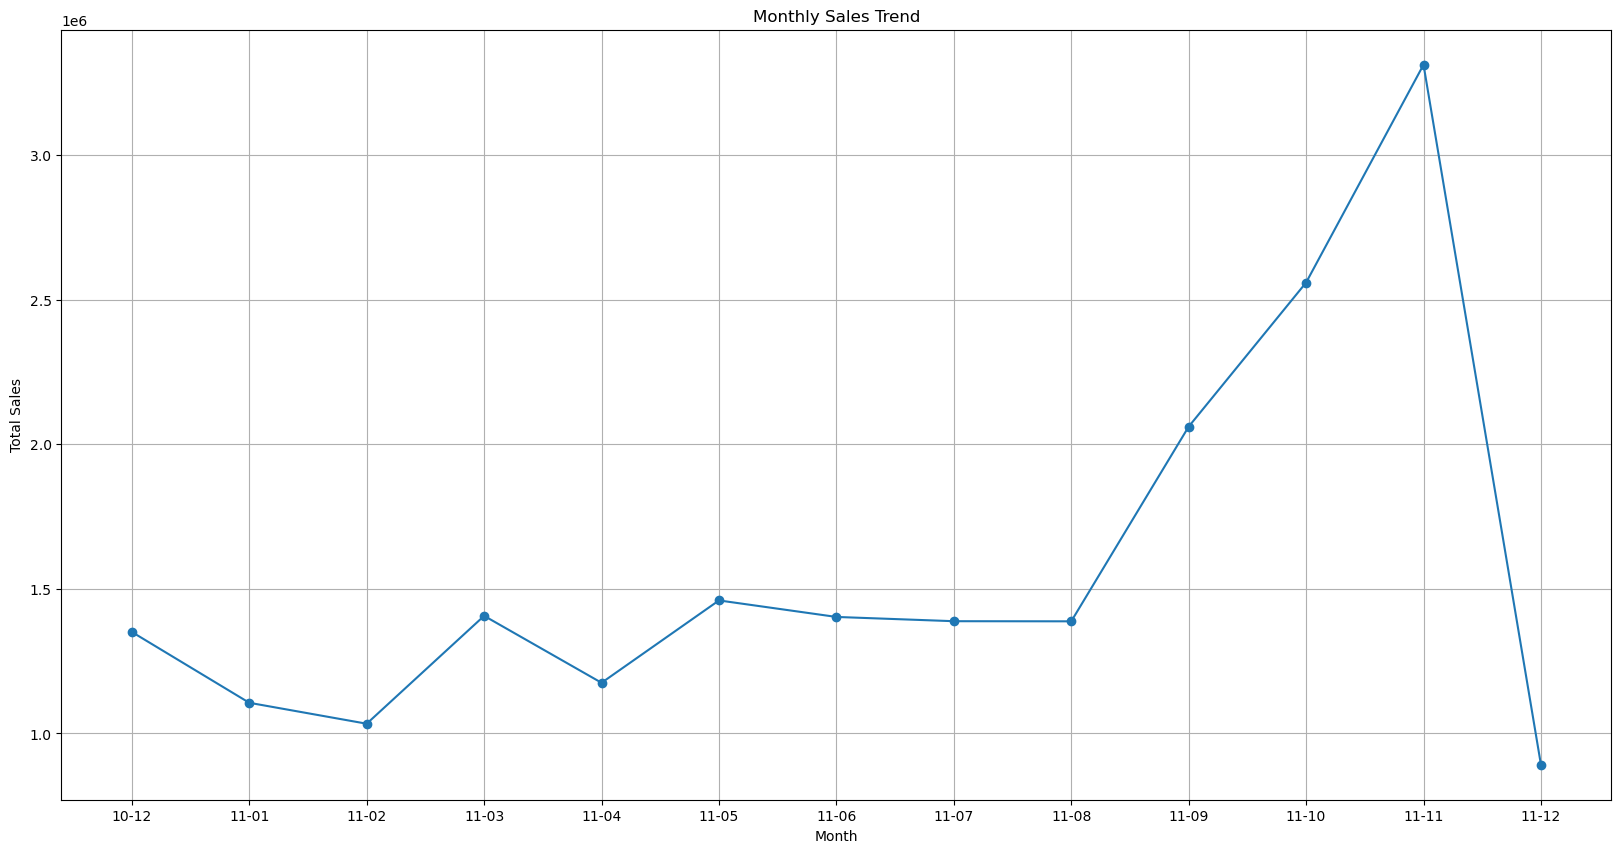

In [265]:
# Create a line plot to visualize the sales trend
print(monthly_sales)

plt.figure(figsize = (20, 10))
plt.plot(monthly_sales.index.strftime('%y-%m'), monthly_sales.values, marker = 'o', linestyle = '-')

plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.title('Monthly Sales Trend')
plt.grid(True)

plt.show();

*Signicant Sales Surge followed by Sharp Decline*
- Sales flunctuated from Dec. 2010 to Aug. 2011, with a significant rise from Aug. to Nov. 2011, followed by a sharp decline in Dec. 2011, dropping below Dec. 2010 levels. This indicates a possible sudden market demand drop.

## Cohort Analysis

In [267]:
cohort_data.head(5)

,InvoiceNo,InvoiceDate,CustomerID,StockCode,Description,Quantity,UnitPrice,Country
0,536365,2010-12-01 08:26:00,17850.0,SC1734,Electronics,65,10.23,Egypt
1,536365,2010-12-01 08:26:00,17850.0,SC2088,Furniture,95,19.61,Mali
2,536365,2010-12-01 08:26:00,17850.0,SC3463,Books,78,61.49,Mali
3,536365,2010-12-01 08:26:00,17850.0,SC6228,Toys,15,24.73,South Africa
4,536365,2010-12-01 08:26:00,17850.0,SC2149,Toys,50,38.83,Rwanda


In [269]:
# Define the Month - Month/day of purchase excluding the purchase time

def get_month(x):
    return dt.datetime(x.year, x.month, 1)

In [271]:
cohort_data['InvoiceDate'] = cohort_data['InvoiceDate'].progress_apply(get_month)

100%|██████████| 406829/406829 [00:02<00:00, 151944.00it/s]


In [273]:
cohort_data.head(5)

,InvoiceNo,InvoiceDate,CustomerID,StockCode,Description,Quantity,UnitPrice,Country
0,536365,2010-12-01,17850.0,SC1734,Electronics,65,10.23,Egypt
1,536365,2010-12-01,17850.0,SC2088,Furniture,95,19.61,Mali
2,536365,2010-12-01,17850.0,SC3463,Books,78,61.49,Mali
3,536365,2010-12-01,17850.0,SC6228,Toys,15,24.73,South Africa
4,536365,2010-12-01,17850.0,SC2149,Toys,50,38.83,Rwanda


In [275]:
# Defining the cohort date - The first day of purchase by a user

def get_cohort_date(cohort_data):
    cohort_data['cohort_date'] = cohort_data.groupby('CustomerID')['InvoiceDate'].transform('min')
    return cohort_data['cohort_date']

In [277]:
cohort_data['cohort_date'] = get_cohort_date(cohort_data)

In [279]:
cohort_data

,InvoiceNo,InvoiceDate,CustomerID,StockCode,Description,Quantity,UnitPrice,Country,cohort_date
0,536365,2010-12-01,17850.0,SC1734,Electronics,65,10.23,Egypt,2010-12-01
1,536365,2010-12-01,17850.0,SC2088,Furniture,95,19.61,Mali,2010-12-01
2,536365,2010-12-01,17850.0,SC3463,Books,78,61.49,Mali,2010-12-01
3,536365,2010-12-01,17850.0,SC6228,Toys,15,24.73,South Africa,2010-12-01
4,536365,2010-12-01,17850.0,SC2149,Toys,50,38.83,Rwanda,2010-12-01
...,...,...,...,...,...,...,...,...,...
541904,581587,2011-12-01,12680.0,SC5440,Furniture,25,36.53,Mozambique,2011-08-01
541905,581587,2011-12-01,12680.0,SC3576,Cloths,94,90.65,Tunisia,2011-08-01
541906,581587,2011-12-01,12680.0,SC5283,Furniture,14,40.07,Somalia,2011-08-01
541907,581587,2011-12-01,12680.0,SC1099,Cosmetics,45,79.83,Senegal,2011-08-01


## Month and Year

In [281]:
# Define the Month and Year of purhase - cohort date (first month/year of purchase), invoice date (latest month/year of purchase)

def get_year_month(cohort_data, col):
    month = cohort_data[col].dt.month
    year = cohort_data[col].dt.year
    return month, year

In [283]:
first_month, first_year = get_year_month(cohort_data, 'cohort_date')

In [285]:
latest_month, latest_year = get_year_month(cohort_data, 'InvoiceDate')

In [287]:
print(f'First Month of Purchase')
print(first_month)
print(f'\nFirst Year of Purchase')
print(first_year)
print(f'\nLatest Month of Purchase')
print(latest_month)
print(f'\nLatest Year of Purchase')
print(latest_year)

First Month of Purchase
0         12
1         12
2         12
3         12
4         12
          ..
541904     8
541905     8
541906     8
541907     8
541908     8
Name: cohort_date, Length: 406829, dtype: int32

First Year of Purchase
0         2010
1         2010
2         2010
3         2010
4         2010
          ... 
541904    2011
541905    2011
541906    2011
541907    2011
541908    2011
Name: cohort_date, Length: 406829, dtype: int32

Latest Month of Purchase
0         12
1         12
2         12
3         12
4         12
          ..
541904    12
541905    12
541906    12
541907    12
541908    12
Name: InvoiceDate, Length: 406829, dtype: int32

Latest Year of Purchase
0         2010
1         2010
2         2010
3         2010
4         2010
          ... 
541904    2011
541905    2011
541906    2011
541907    2011
541908    2011
Name: InvoiceDate, Length: 406829, dtype: int32


## Cohort Index

In [291]:
# Define the Cohort Index - This represents the number of months between a cohort's first and subsequent purchases. It helps track cohort behavior over time.

def create_cohort_index(first_month, first_year, latest_month, latest_year):
    year_diff = latest_year - first_year
    month_diff = latest_month - first_month
    index = year_diff * 12 + month_diff + 1
    return index

In [293]:
cohort_data['cohort_index'] = create_cohort_index(first_month, first_year, latest_month, latest_year)

In [295]:
cohort_data

,InvoiceNo,InvoiceDate,CustomerID,StockCode,Description,Quantity,UnitPrice,Country,cohort_date,cohort_index
0,536365,2010-12-01,17850.0,SC1734,Electronics,65,10.23,Egypt,2010-12-01,1
1,536365,2010-12-01,17850.0,SC2088,Furniture,95,19.61,Mali,2010-12-01,1
2,536365,2010-12-01,17850.0,SC3463,Books,78,61.49,Mali,2010-12-01,1
3,536365,2010-12-01,17850.0,SC6228,Toys,15,24.73,South Africa,2010-12-01,1
4,536365,2010-12-01,17850.0,SC2149,Toys,50,38.83,Rwanda,2010-12-01,1
...,...,...,...,...,...,...,...,...,...,...
541904,581587,2011-12-01,12680.0,SC5440,Furniture,25,36.53,Mozambique,2011-08-01,5
541905,581587,2011-12-01,12680.0,SC3576,Cloths,94,90.65,Tunisia,2011-08-01,5
541906,581587,2011-12-01,12680.0,SC5283,Furniture,14,40.07,Somalia,2011-08-01,5
541907,581587,2011-12-01,12680.0,SC1099,Cosmetics,45,79.83,Senegal,2011-08-01,5


## Cohort Table 
- A pivot table that displays the number of customers for each cohort (grouped by their starting month, cohort_date) across different time periods (cohort_index), showing customer behavior (retention rate) over time.

In [306]:
# To Group the data by 'cohort_date' and 'cohort_index', counts the unique number of customers in each group, and rename the column to 'Number of Customers'.
cohort_info = cohort_data.groupby(['cohort_date', 'cohort_index'])['CustomerID'].nunique().reset_index()

In [308]:
cohort_info.rename(columns = {'CustomerID' : 'Number of Customers'}, inplace = True)

In [310]:
cohort_info

,cohort_date,cohort_index,Number of Customers
0,2010-12-01,1,948
1,2010-12-01,2,362
2,2010-12-01,3,317
3,2010-12-01,4,367
4,2010-12-01,5,341
...,...,...,...
86,2011-10-01,2,93
87,2011-10-01,3,46
88,2011-11-01,1,321
89,2011-11-01,2,43


In [312]:
# Creating the Cohort Table

cohort_table = cohort_info.pivot(index = 'cohort_date', columns = ['cohort_index'], values = 'Number of Customers')
cohort_table.index = cohort_table.index.strftime('%B %Y')

cohort_index       1      2      3      4      5      6      7      8      9   \
cohort_date                                                                     
December 2010   948.0  362.0  317.0  367.0  341.0  376.0  360.0  336.0  336.0   
January 2011    421.0  101.0  119.0  102.0  138.0  126.0  110.0  108.0  131.0   
February 2011   380.0   94.0   73.0  106.0  102.0   94.0   97.0  107.0   98.0   
March 2011      440.0   84.0  112.0   96.0  102.0   78.0  116.0  105.0  127.0   
April 2011      299.0   68.0   66.0   63.0   62.0   71.0   69.0   78.0   25.0   
May 2011        279.0   66.0   48.0   48.0   60.0   68.0   74.0   29.0    NaN   
June 2011       235.0   49.0   44.0   64.0   58.0   79.0   24.0    NaN    NaN   
July 2011       191.0   40.0   39.0   44.0   52.0   22.0    NaN    NaN    NaN   
August 2011     167.0   42.0   42.0   42.0   23.0    NaN    NaN    NaN    NaN   
September 2011  298.0   89.0   97.0   36.0    NaN    NaN    NaN    NaN    NaN   
October 2011    352.0   93.0

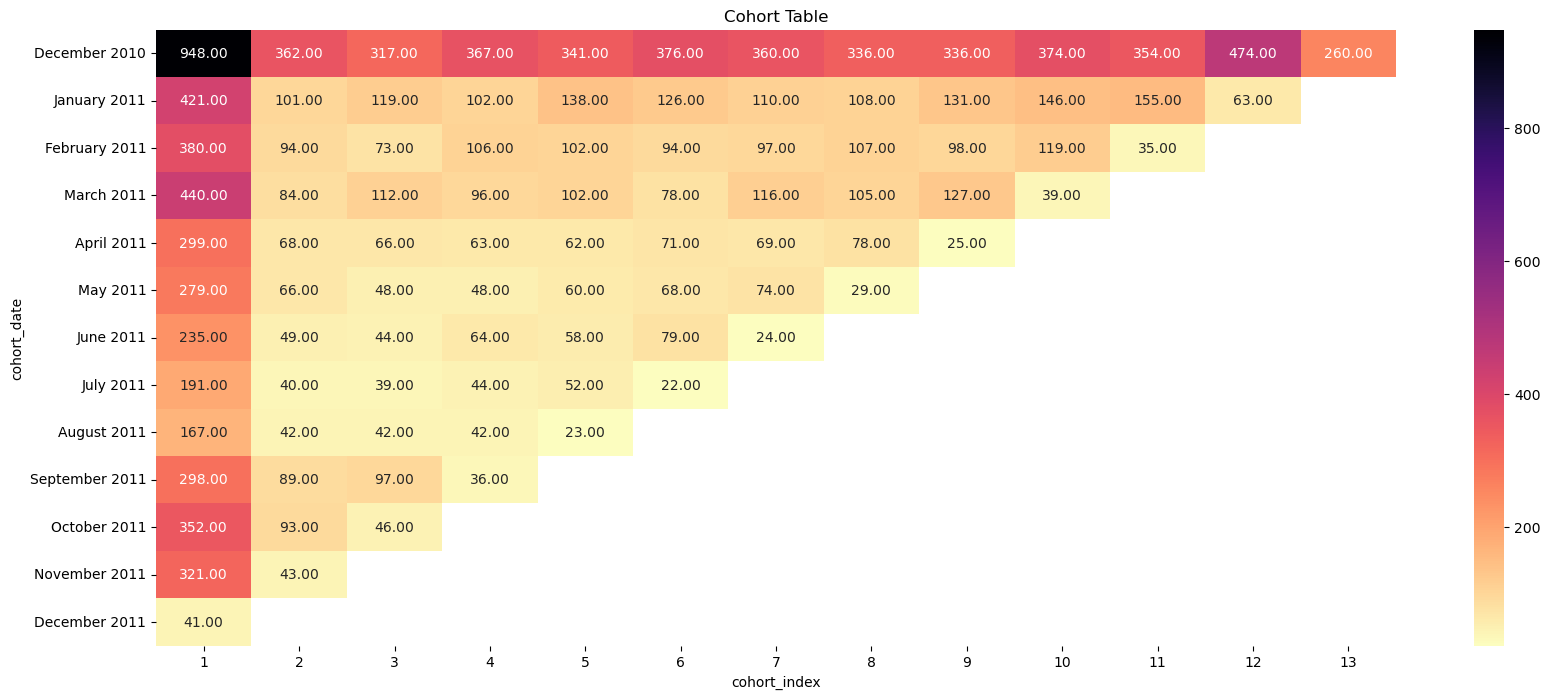

In [314]:
print(cohort_table)

# To visualize the Cohort Table of the Number of customers
plt.figure(figsize = (20,8))
sns.heatmap(cohort_table, annot = True, cmap = 'magma_r',fmt ='.2f')

plt.title('Cohort Table')

plt.show();

In [316]:
# To visualize the cohort table of customers in percentage to get the retention rate
cohort_table_percent = cohort_table.divide(cohort_table.iloc[:,0], axis = 0)

cohort_index     1         2         3         4         5         6   \
cohort_date                                                             
December 2010   1.0  0.381857  0.334388  0.387131  0.359705  0.396624   
January 2011    1.0  0.239905  0.282660  0.242280  0.327791  0.299287   
February 2011   1.0  0.247368  0.192105  0.278947  0.268421  0.247368   
March 2011      1.0  0.190909  0.254545  0.218182  0.231818  0.177273   
April 2011      1.0  0.227425  0.220736  0.210702  0.207358  0.237458   
May 2011        1.0  0.236559  0.172043  0.172043  0.215054  0.243728   
June 2011       1.0  0.208511  0.187234  0.272340  0.246809  0.336170   
July 2011       1.0  0.209424  0.204188  0.230366  0.272251  0.115183   
August 2011     1.0  0.251497  0.251497  0.251497  0.137725       NaN   
September 2011  1.0  0.298658  0.325503  0.120805       NaN       NaN   
October 2011    1.0  0.264205  0.130682       NaN       NaN       NaN   
November 2011   1.0  0.133956       NaN       NaN  

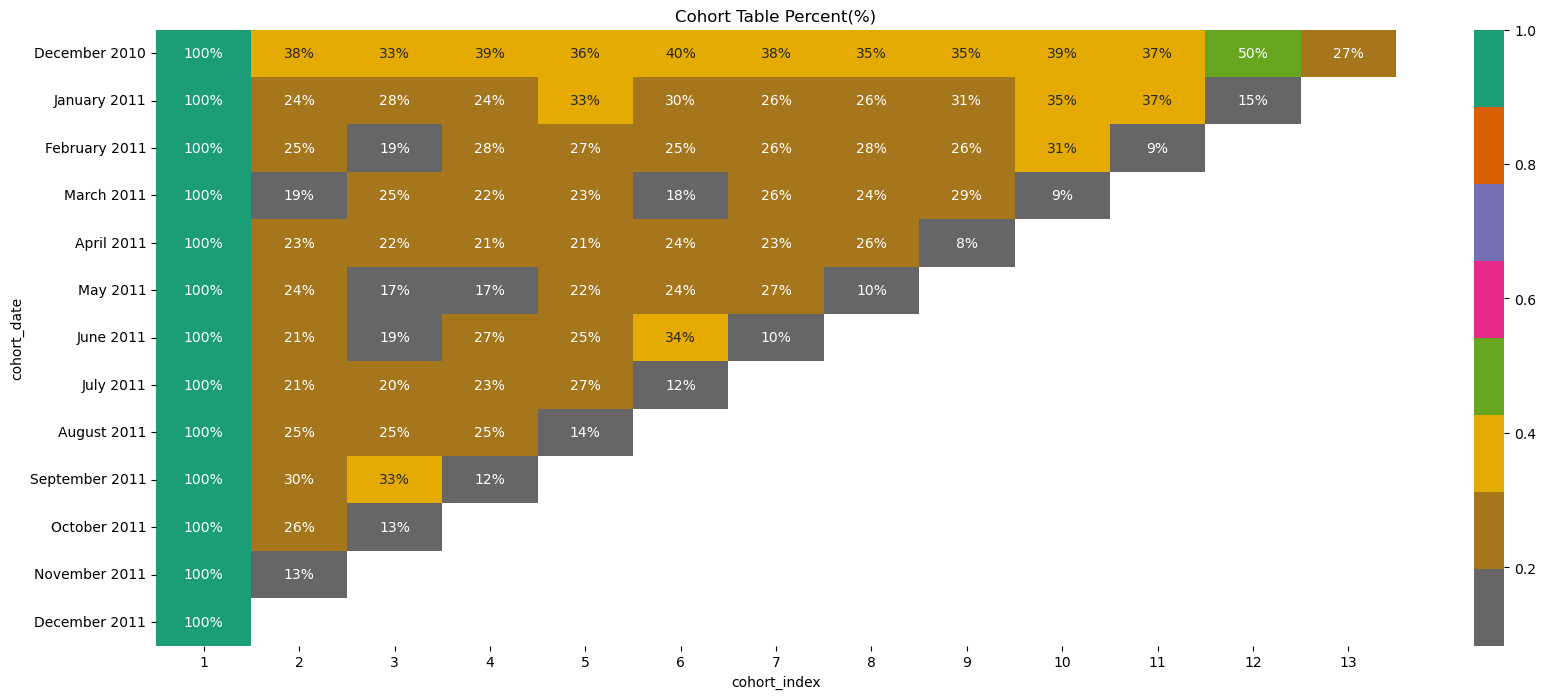

In [318]:
print(cohort_table_percent)

plt.figure(figsize = (20, 8))
sns.heatmap(cohort_table_percent, annot = True, cmap = 'Dark2_r', fmt = '.0%')

plt.title('Cohort Table Percent(%)')

plt.show();

Insight from the Cohort Table Analysis
---
The cohort analysis reveals a consistent decline in customer retention across all cohorts over time. For instance;
1. The December 2010 cohort shows a relatively strong retention, with:
    - 38% of customers remaining by a month 2
    - 27% of customers still engaged by latest month(13)
---
2. The January 2011 cohort sees a steeper decline:
    - Retains 24% of customers by a month 2
    - Drops to just 15% retention by latest month(12)
---
3. Mid-2011 cohorts, like June, show sharp declines:
    - 34% retention by month 6
    - Drops to 10% by month 7
---
4. The end-2011 cohorts show more significant declines:
    - October 2011 retains only 13% by month 3
    - November 2011 retains 13% by month 2 and no further data beyond that, indicating a rapid drop-off. Hence the significant decline in sales as shown in the sales trend analysis above.
---
Overall, most cohorts experience a rapid decline in retention after the first few months, with significant challenges in maintaining customer engagement beyond month 6 across all cohorts.
    

# Using the Cohort Analysis for further analysis of the customer behaviour for the following:
1. Quantity Bought by Each Cohort.
2. Average Quantity Bought by Each Cohort.
3. 

*1. Quantity Bought by Each Cohort*

In [363]:
# The Quantity of Customer Purchases for each Cohort Overtime
quantity_bought = cohort_data.groupby(['cohort_date', 'cohort_index'])['Quantity'].sum().reset_index()

In [365]:
quantity_bought

,cohort_date,cohort_index,Quantity
0,2010-12-01,1,1350834
1,2010-12-01,2,546873
2,2010-12-01,3,462374
3,2010-12-01,4,613244
4,2010-12-01,5,510943
...,...,...,...
86,2011-10-01,2,181888
87,2011-10-01,3,44776
88,2011-11-01,1,574330
89,2011-11-01,2,56021


In [367]:
# Creating Quantity (pivot) table to display in a table the total quantity of customer purchases for each cohort overtime.
quantity_table = quantity_bought.pivot(index = 'cohort_date', columns = ['cohort_index'], values = 'Quantity') 
quantity_table.index = quantity_table.index.strftime('%B %Y')

In [350]:
quantity_table

cohort_index,1,2,3,4,5,6,7,8,9,10,11,12,13
cohort_date,,,,,,,,,,,,,
December 2010,1350834.0,546873.0,462374.0,613244.0,510943.0,636443.0,597676.0,604504.0,600481.0,757806.0,725896.0,1165046.0,375469.0
January 2011,559013.0,121074.0,155931.0,120023.0,194675.0,166585.0,144835.0,149848.0,200661.0,258400.0,330607.0,76504.0,NaN
February 2011,450020.0,74008.0,98850.0,122918.0,111386.0,104214.0,108442.0,135276.0,151180.0,145405.0,21787.0,NaN,NaN
March 2011,563434.0,74215.0,125519.0,119480.0,122078.0,107554.0,139852.0,182259.0,212009.0,49685.0,NaN,NaN,NaN
April 2011,371021.0,71541.0,66410.0,65115.0,70639.0,105065.0,97319.0,110572.0,27119.0,NaN,NaN,NaN,NaN
May 2011,308885.0,55453.0,44637.0,45690.0,76473.0,118534.0,97156.0,41183.0,NaN,NaN,NaN,NaN,NaN
June 2011,285867.0,47847.0,35516.0,76483.0,88504.0,127400.0,31264.0,NaN,NaN,NaN,NaN,NaN,NaN
July 2011,254889.0,25983.0,68721.0,69466.0,91529.0,26831.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
August 2011,243542.0,80156.0,144849.0,141888.0,45405.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


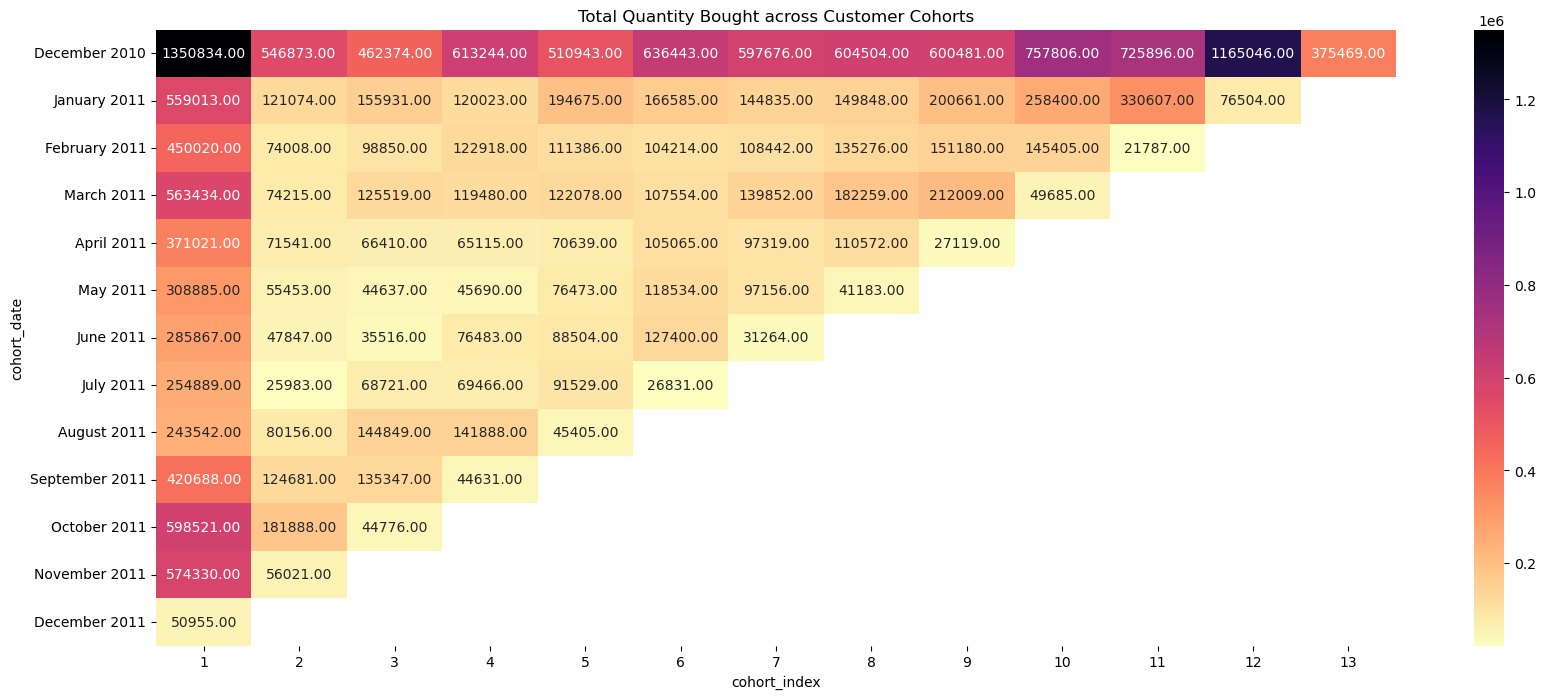

In [369]:
# To visualize the Total Quantity Table of customer purchases for each cohort overtime
plt.figure(figsize = (20,8))
sns.heatmap(quantity_table, annot = True, cmap = 'magma_r',fmt ='.2f')

plt.title('Total Quantity Bought across Customer Cohorts')

plt.show();

Insight from the Total Quantity Bought across customer cohorts
---
The pivot/heatmap visualization of Total Quantity Bought across customer cohorts reveals the following key insights:
1. December 2010 Cohort: Shows the highest total quantity bought, with significant peaks early on and a sharp drop by month 13.
---
2. January 2011 Cohort: Demonstrates lower total purchases compared to December 2010 but shows an increase in quantities from months 10 to 11, despite a decline in customer retention. This suggests that remaining customers bought more, even as fewer customers stayed.
---
3. February to April 2011 Cohorts: Display a general trend of decreasing total quantities bought over time, with occasional spikes and drops, reflecting varied customer purchasing behavior.
---
4. May to July 2011 Cohorts: Exhibit varied spending patterns with noticeable peaks but overall lower totals compared to earlier cohorts, indicating declining purchasing activity.
---
5. August to December 2011 Cohorts: Show a continuous decline in total purchases over time, with the December 2011 cohort exhibiting very low quantities, signaling a sharp reduction in customer purchases.
---
Overall, there is a trend of decreasing purchase quantities over time, with some cohorts (e.g., January 2011) experiencing higher purchases despite declining retention, while others (e.g., August 2011) saw decreased purchases despite stable retention. This indicates that customer retention and purchasing behavior can be influenced by different factors.
    

*2. Average Quantity Bought by Each Cohort*

In [382]:
# The Average Quantity of Customer Purchases for each Cohort Overtime
Avg_quantity_bought = cohort_data.groupby(['cohort_date', 'cohort_index'])['Quantity'].mean().reset_index()
Avg_quantity_bought.rename(columns = {'Quantity' : 'Avg_Quantity'}, inplace = True)
Avg_quantity_bought

,cohort_date,cohort_index,Avg_Quantity
0,2010-12-01,1,50.310391
1,2010-12-01,2,50.259443
2,2010-12-01,3,50.351084
3,2010-12-01,4,50.635290
4,2010-12-01,5,50.628518
...,...,...,...
86,2011-10-01,2,49.928081
87,2011-10-01,3,49.367144
88,2011-11-01,1,51.056094
89,2011-11-01,2,48.629340


In [392]:
# Creating Quantity (pivot) table to display in a table the average quantity of customer purchases for each cohort overtime.
Avg_quantity_table = Avg_quantity_bought.pivot(index = 'cohort_date', columns = ['cohort_index'], values = 'Avg_Quantity') 
Avg_quantity_table.index = Avg_quantity_table.index.strftime('%B %Y')
Avg_quantity_table

cohort_index,1,2,3,4,5,6,7,8,9,10,11,12,13
cohort_date,,,,,,,,,,,,,
December 2010,50.310391,50.259443,50.351084,50.635290,50.628518,50.423309,50.526334,50.467858,50.182266,50.574346,50.546341,50.640963,50.677419
January 2011,50.676548,50.616221,50.758789,50.621257,50.908734,50.373450,50.289931,50.436890,50.468058,49.942018,50.590207,50.531044,NaN
February 2011,51.208466,49.736559,51.032525,50.334971,50.219116,50.687743,49.180045,50.741185,50.919502,49.592428,50.085057,NaN,NaN
March 2011,50.527666,50.213126,50.247798,50.243902,50.114122,50.613647,50.000715,51.081558,50.120331,50.441624,NaN,NaN,NaN
April 2011,50.685929,49.854355,49.969902,50.127021,50.637276,50.318487,50.294057,49.919639,51.071563,NaN,NaN,NaN,NaN
May 2011,50.745030,49.379341,50.153933,49.663043,51.186747,50.547548,49.926002,51.350374,NaN,NaN,NaN,NaN,NaN
June 2011,50.578025,50.955272,48.452933,50.550562,51.366222,50.878594,50.263666,NaN,NaN,NaN,NaN,NaN,NaN
July 2011,50.734275,49.491429,50.791574,50.083634,49.771071,50.720227,NaN,NaN,NaN,NaN,NaN,NaN,NaN
August 2011,50.506429,49.848259,50.434889,51.038849,50.171271,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


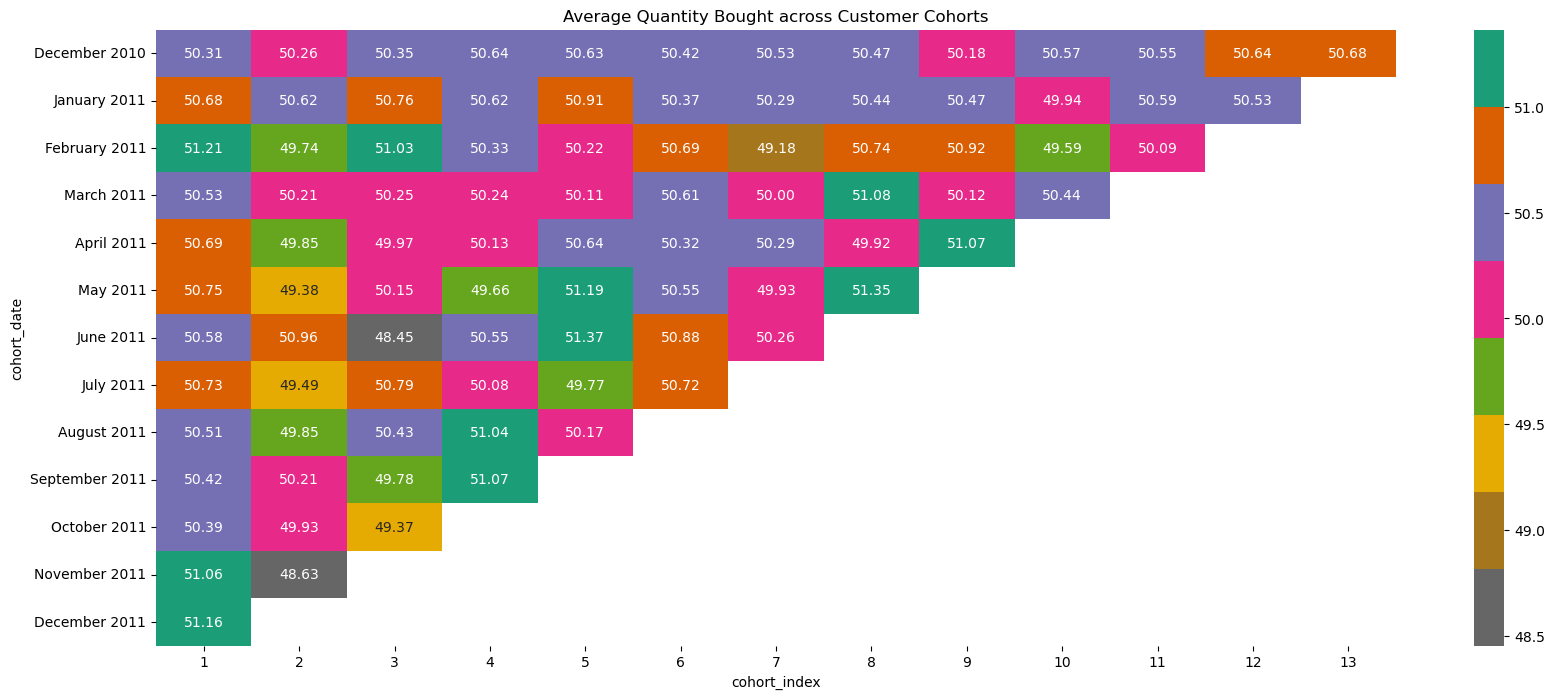

In [396]:
# To visualize the Average Quantity Table of the customer purchases for each cohort overtime
plt.figure(figsize = (20,8))
sns.heatmap(Avg_quantity_table, annot = True, cmap = 'Dark2_r',fmt ='.2f')

plt.title('Average Quantity Bought across Customer Cohorts')

plt.show();

Insight from the Average Quantity Bought across customer cohorts
---
The pivot/heatmap visualization of Average Quantity Bought across customer cohorts reveals the following key insights:
1. Stable Spending: 
    - Most cohorts, especially from December 2010 to December 2011, show relatively stable average quantities bought per customer, hovering around 50 units.
---
2. Fluctuations: 
    - Some cohorts, like January 2011 and February 2011, exhibit slight variations in average quantity bought, with occasional increases and decreases but overall maintaining stability.
---
3. Limited Data in Later Months: 
    - There is a noticeable lack of data for many cohorts in the later months, particularly from October 2011 onward, limiting analysis of long-term trends.
---
Overall, the average quantity bought remains consistent across cohorts, indicating stable purchasing behavior over time, though some variations and data gaps are observed.